<a href="https://colab.research.google.com/github/Dhee2211/ML/blob/main/dogs_cats_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf 

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import os 
import matplotlib.pyplot as plt 
import numpy as np 



In [4]:
import logging 
logger = tf.get_logger()
logger.setLevel(logging.ERROR)


In [5]:
_url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip',origin =_url, extract = True)

68616192/68606236 [==============================] - 1s 0us/step


In [6]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train/cats


In [7]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')


In [8]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))
 
num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val


In [9]:
#Batch size 
BATCH_SIZE = 100 
IMG_SHAPE = 150 



In [10]:
train_image_generator = ImageDataGenerator(rescale = 1./255)
validation_image_generator = ImageDataGenerator(rescale = 1./255)


In [11]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE, directory=train_dir,
                                                           shuffle = True,
                                                           target_size = (IMG_SHAPE,IMG_SHAPE),
                                                           class_mode = 'binary')


Found 2000 images belonging to 2 classes.


In [12]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size= BATCH_SIZE, 
                                                              directory = validation_dir,
                                                              shuffle = False, 
                                                              target_size = (IMG_SHAPE,IMG_SHAPE),
                                                              class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [13]:
sample_training_images, _ = next(train_data_gen) # next function return a batch of from the dataset. It is a tuple with photo and label here we are neglecting labels


In [14]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1,5, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

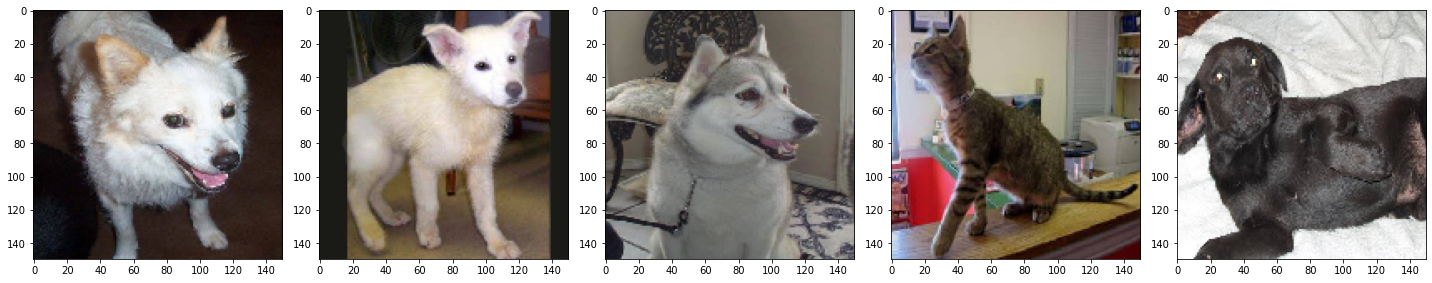

In [15]:
plotImages(sample_training_images[:5])

In [16]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu',input_shape = (150,150,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(2)
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [18]:
model.compile(optimizer='adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
EPOCHS = 100 
history = model.fit_generator(
    train_data_gen, 
    steps_per_epoch = int(np.ceil(total_train/float(BATCH_SIZE))),
    epochs= EPOCHS,
    validation_data = val_data_gen,
    validation_steps = int(np.ceil(total_val/float(BATCH_SIZE)))
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/100
20/20 [==============================] - 22s 544ms/step - loss: 0.9341 - accuracy: 0.5295 - val_loss: 0.6921 - val_accuracy: 0.5000
Epoch 2/100
20/20 [==============================] - 10s 522ms/step - loss: 0.6858 - accuracy: 0.5555 - val_loss: 0.6689 - val_accuracy: 0.6480
Epoch 3/100
20/20 [==============================] - 11s 529ms/step - loss: 0.6396 - accuracy: 0.6270 - val_loss: 0.6160 - val_accuracy: 0.6830
Epoch 4/100
20/20 [==============================] - 10s 525ms/step - loss: 0.5572 - accuracy: 0.7190 - val_loss: 0.5859 - val_accuracy: 0.6950
Epoch 5/100
20/20 [==============================] - 10s 524ms/step - loss: 0.5168 - accuracy: 0.7460 - val_loss: 0.6092 - val_accuracy: 0.6800
Epoch 6/100
20/20 [==============================] - 10s 515ms/step - loss: 0.4619 - accuracy: 0.7685 - val_loss: 0.6230 - val_accuracy: 0.6740
Epoch 7/100
20/20 [==============================] - 11s 556ms/step - loss: 0.4322 - accuracy: 0.7935 - val_loss: 0.6211 - val_accuracy:

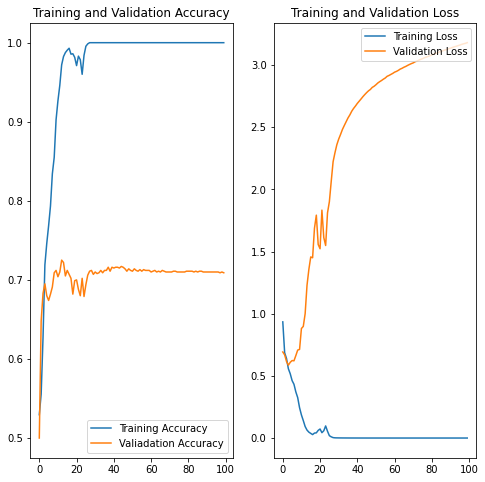

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range,val_acc, label='Valiadation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc= 'upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()